# Project Description

The telecom operator Interconnect would like to be able to forecast their churn of clients. If it is discovered that a user is planning to leave, they will be offered promotional codes and special plan options. Interconnect's marketing team has collected some of their clientele's personal data, including information about their plans and contracts.

## Interconnect's Services

Interconnect mainly provides two types of service:
 - Landline communication: the telephone can be connected to several lines simultaneously.
 - Internet: the network can be set up via a telephone line or through a fiber optic cable.
 
Some other services the company provides:
 - Internet security: antivirus software (`'DeviceProtection'`) and a malicious website blocker (`'OnlineSecurity'`)
 - Dedicated technical support line (`'TechSupport'`)
 - Cloud file storage and data backup (`'OnlineBackup'`)
 - TV streaming (`'StreamingTV'`) and a movie directory (`'StreamingMovies'`)
 
The clients can choose either a monthly payment or sign a one- or two-year contract. Clients can use various payment methods and recieve an electronic invoice after a transaction. 

## Description of the Data

**The data consists of files obtained from different sources:**
 - contact.csv - contract information
 - personal.csv - client's personal data
 - internet.csv - information about internet services
 - phone.csv - information about telephone services
 
In each file the column `'customerID'` contains a unique code assigned to each client.

 
**The following is a complete list of values from all of the data files:**
 - `'customerID'` - Unique ID
 - `'gender'` - Gender
 - `'SeniorCitizen'` - Whether senior citizen or not
 - `'Partner'` - Has partner or not
 - `'Dependents'` - Number of dependents
 - `'BeginDate'` - Joining date
 - `'EndDate'` - Ending date
 - `'Type'` - Plan type
 - `'PaperlessBilling'` - Type of paperpless billing
 - `'PaymentMethod'` - Payment method
 - `'MonthlyCharges'` - Monthly charges
 - `'TotalCharges'` - Total charges
 - `'MultipleLines'` - Whether has multiple lines
 - `'InternetService'` - Whether has internet service
 - `'OnlineSecurity'` - Whether has online security
 - `'OnlineBackup'` - Whether has online backup
 - `'DeviceProtection'` - Whether has device protection
 - `'TechSupport'` - Whether has tech support
 - `'StreamingTV'` - Whether has streaming TV
 - `'StreamingMovies'` - Whether has streaming movies
 - `'is_churned'` - Whether churned
 - `'num_days'` - Number of days in the system
 - `'year'` - Year
 - `'num_services'` - Number of services availed

In [46]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.api.types import is_numeric_dtype



In [2]:
contract = pd.read_csv('/datasets/final_provider/contract.csv')
personal = pd.read_csv('/datasets/final_provider/personal.csv')
internet = pd.read_csv('/datasets/final_provider/internet.csv')
phone = pd.read_csv('/datasets/final_provider/phone.csv')

### Contract Data

In [3]:
# data shape

contract.shape

(7043, 8)

In [4]:
# first look/top five

contract.head()

,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,7590-VHVEG,2020-01-01,No,Month-to-month,Yes,Electronic check,29.85,29.85
1,5575-GNVDE,2017-04-01,No,One year,No,Mailed check,56.95,1889.5
2,3668-QPYBK,2019-10-01,2019-12-01 00:00:00,Month-to-month,Yes,Mailed check,53.85,108.15
3,7795-CFOCW,2016-05-01,No,One year,No,Bank transfer (automatic),42.30,1840.75
4,9237-HQITU,2019-09-01,2019-11-01 00:00:00,Month-to-month,Yes,Electronic check,70.70,151.65


In [5]:
# checking for missing values

contract.isnull().sum()

customerID          0
BeginDate           0
EndDate             0
Type                0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
dtype: int64

In [6]:
# checking for duplicates

contract.duplicated().sum()

0

In [7]:
# checking dtypes

contract.dtypes

customerID           object
BeginDate            object
EndDate              object
Type                 object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
dtype: object

In [8]:
# five point summary

contract.describe()

,MonthlyCharges
count,7043.000000
mean,64.761692
std,30.090047
min,18.250000
25%,35.500000
50%,70.350000
75%,89.850000
max,118.750000


### Personal Data

In [9]:
# data shape

personal.shape

(7043, 5)

In [10]:
# first look/top five

personal.head()

,customerID,gender,SeniorCitizen,Partner,Dependents
0,7590-VHVEG,Female,0,Yes,No
1,5575-GNVDE,Male,0,No,No
2,3668-QPYBK,Male,0,No,No
3,7795-CFOCW,Male,0,No,No
4,9237-HQITU,Female,0,No,No


In [11]:
# checking for missing values

personal.isnull().sum()

customerID       0
gender           0
SeniorCitizen    0
Partner          0
Dependents       0
dtype: int64

In [12]:
# checking for duplicates

personal.duplicated().sum()

0

In [13]:
# checking dtypes

personal.dtypes

customerID       object
gender           object
SeniorCitizen     int64
Partner          object
Dependents       object
dtype: object

In [14]:
# five point summary

personal.describe()

,SeniorCitizen
count,7043.000000
mean,0.162147
std,0.368612
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


### Internet Data

In [15]:
# data shape

internet.shape

(5517, 8)

In [16]:
# first look/top five

internet.head()

,customerID,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,Fiber optic,No,No,No,No,No,No


In [17]:
# checking for missing values

internet.isnull().sum()

customerID          0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
dtype: int64

In [18]:
# checking for duplicates

internet.duplicated().sum()

0

In [19]:
# checking dtypes

internet.dtypes

customerID          object
InternetService     object
OnlineSecurity      object
OnlineBackup        object
DeviceProtection    object
TechSupport         object
StreamingTV         object
StreamingMovies     object
dtype: object

In [20]:
# five point summary

internet.describe()

,customerID,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
count,5517,5517,5517,5517,5517,5517,5517,5517
unique,5517,2,2,2,2,2,2,2
top,8071-SBTRN,Fiber optic,No,No,No,No,No,No
freq,1,3096,3498,3088,3095,3473,2810,2785


### Phone Data

In [21]:
# data shape

phone.shape

(6361, 2)

In [22]:
# first look/top five

phone.head()

,customerID,MultipleLines
0,5575-GNVDE,No
1,3668-QPYBK,No
2,9237-HQITU,No
3,9305-CDSKC,Yes
4,1452-KIOVK,Yes


In [23]:
# checking for missing values

phone.isnull().sum()

customerID       0
MultipleLines    0
dtype: int64

In [24]:
# checking for duplicates

phone.duplicated().sum()

0

In [25]:
# checking dtypes

phone.dtypes

customerID       object
MultipleLines    object
dtype: object

In [26]:
# five point summary

phone.describe()

,customerID,MultipleLines
count,6361,6361
unique,6361,2
top,3045-XETSH,No
freq,1,3390


#### Conclusion
 - The data is broken down into 4 tables:
     - Contract - describes the payment plan the customer is on
     - Personal - captures the demographic information about the customer
     - Internet - descricbes the type of internet connect the customer has
     - Phone - captures information on whether the customer has mulitple lines or not
 - There are 7,043 customers, however, based on the shapes of the datasets, when the phone and internet datasets are joined with the contract dataset, there will be missing values in the phone and internet datasets respectively.
 - There are no missing or duplicate values.
 - The `'BeginDate'`, `'EndDate'`, and `'TotalCharges'` columns need a change of data type.
 - The average monthly charge is \\$64 and the `'MonthlyCharges'` ranges from \\$18 to \\$118.
 - It appears that there are several boolean features in these datasets.
 - The target feature - churn, will need to be created using `'BeginDate'` and `'EndDate'`.

### EDA

*Join the four dataframes*

In [27]:
all_df = personal.merge(contract, left_on=['customerID'], right_on=['customerID'], how='left')
all_df = all_df.merge(phone, left_on=['customerID'], right_on=['customerID'], how='left')
all_df = all_df.merge(internet, left_on=['customerID'], right_on=['customerID'], how='left')

In [28]:
all_df.shape

(7043, 20)

In [29]:
all_df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,Female,0,Yes,No,2020-01-01,No,Month-to-month,Yes,Electronic check,29.85,29.85,NaN,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,Male,0,No,No,2017-04-01,No,One year,No,Mailed check,56.95,1889.5,No,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,Male,0,No,No,2019-10-01,2019-12-01 00:00:00,Month-to-month,Yes,Mailed check,53.85,108.15,No,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,Male,0,No,No,2016-05-01,No,One year,No,Bank transfer (automatic),42.30,1840.75,NaN,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,Female,0,No,No,2019-09-01,2019-11-01 00:00:00,Month-to-month,Yes,Electronic check,70.70,151.65,No,Fiber optic,No,No,No,No,No,No


#### Changing the datatypes

 - `'BeginDate'`
 - `'EndDate'`
 - `'TotalChurn'`

In [30]:
all_df['BeginDate'] = pd.to_datetime(all_df['BeginDate'], format='%Y-%m-%d')

In [31]:
all_df['EndDate'] = pd.to_datetime(all_df['EndDate'], format='%Y-%m-%d', errors='coerce')

In [32]:
all_df['TotalCharges'] = all_df['TotalCharges'].replace(" ", np.nan).astype(np.float32)

In [33]:
# conversion to numeric failed due to records having empty strings stored as spaces

all_df['TotalCharges'].isnull().sum()

11

In [35]:
# min and max BeginDate

all_df['BeginDate'].min(), all_df['BeginDate'].max()

(Timestamp('2013-10-01 00:00:00'), Timestamp('2020-02-01 00:00:00'))

In [36]:
# min and max EndDate

all_df['EndDate'].min(), all_df['EndDate'].max()

(Timestamp('2019-10-01 00:00:00'), Timestamp('2020-01-01 00:00:00'))

#### Percent Churned

In [37]:
100 * all_df[all_df['EndDate'].notnull()].shape[0] / all_df.shape[0]

26.536987079369588

Create Target Feature

In [38]:
all_df['is_churned'] = all_df['EndDate'].apply(lambda x: 0 if pd.isna(x) else 1)

In [39]:
all_df['is_churned'].value_counts(normalize=True)

0    0.73463
1    0.26537
Name: is_churned, dtype: float64

In [41]:
# average monthly charges by is_churned

all_df.groupby('is_churned')['MonthlyCharges'].mean()

is_churned
0    61.265124
1    74.441332
Name: MonthlyCharges, dtype: float64

#### Compare Monthly Charges Between Churned and Active Customers

In [43]:
def remove_outliers(df, field):
    """
    Calculate and remove outliers
    for a given Series
    """
    Q1 = df[field].sum(axis=1).quantile(0.25)
    Q3 = df[field].sum(axis=1).quantile(0.75)
    IQR = Q3 - Q1
    lb = Q1 - 1.5 * IQR
    ub = Q3 + 1.5 * IQR

    return df[(df[field].sum(axis=1) > lb) &  (df[field].sum(axis=1) < ub)][field]

In [44]:
def plot_hist(df, var, bins=30, 
                              title=None, xlabel=None, 
                              legends={},
                              r=1, c=1,
                              by=None,
                              remove_outlier = False,
                              is_facet=False,
                              col=None,
                              row=None,
                              figsize=(9, 7)):
    """
    Plot Histograms of numeric features
    """
    if by:
        axes = df[var].hist(by=df[by], figsize=figsize)
        if is_numeric_dtype(df[by]):
            for ax in axes:
                ax.set_title(legends[int(ax.get_title())])
    if is_facet:
        g = sns.FacetGrid(df, col=col, row=row)
        g.map(plt.hist, var)

    plt.suptitle(title)
    plt.tight_layout(rect=[0, 0.03, 1, 0.95]) 

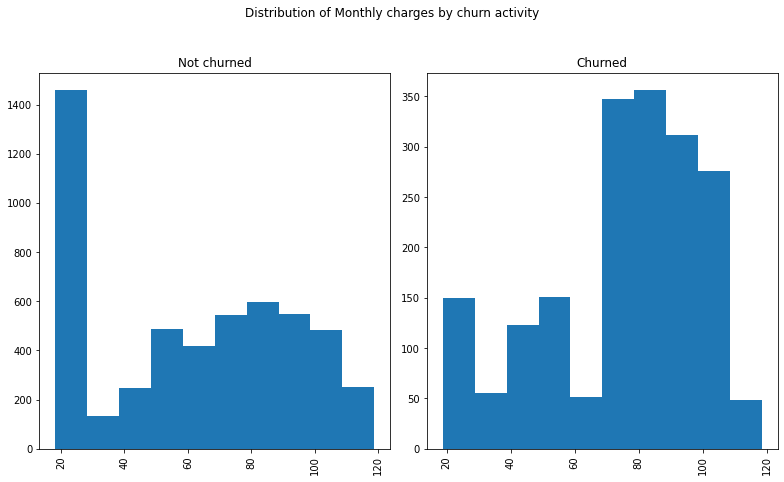

In [47]:
var = 'MonthlyCharges'
plot_hist(all_df, var, bins=30, 
                              title='Distribution of Monthly charges by churn activity', xlabel=None, 
                              legends={0: 'Not churned', 1: 'Churned'},
                              r=1, c=1,
                              by='is_churned',
                              figsize=(11, 7))

In [49]:
# proportion of high spending churned customers

all_df[(all_df['is_churned'] == 1) &
      (all_df['MonthlyCharges'] >= 70)].shape[0] /all_df[(all_df['is_churned'] == 1)].shape[0] 

0.6816479400749064

 - 68% of churned customers are in the high spending category.
 - Most of the customers in the "Not churned" category appear to be low spenders.

In [50]:
# gender count

all_df['gender'].value_counts(normalize=True)

Male      0.504756
Female    0.495244
Name: gender, dtype: float64

In [51]:
# mean monthly charges by gender

all_df.groupby('gender')['MonthlyCharges'].mean()

gender
Female    65.204243
Male      64.327482
Name: MonthlyCharges, dtype: float64

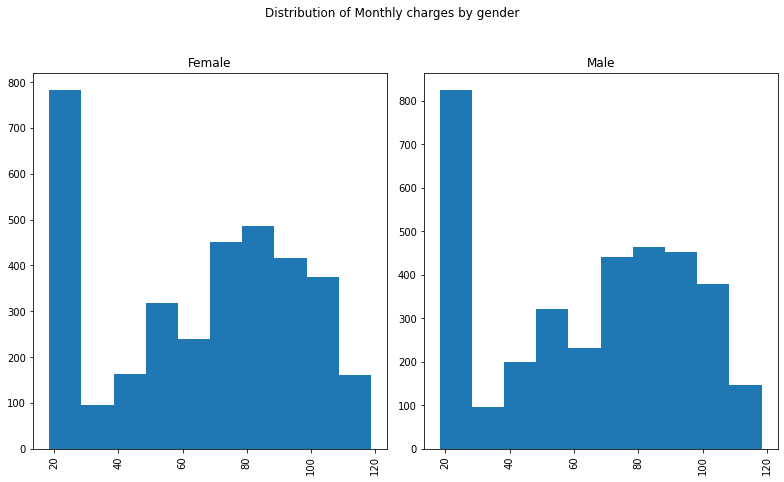

In [52]:
plot_hist(all_df, var, bins=30, 
                              title='Distribution of Monthly charges by gender', xlabel=None, 
                              legends={0: 'Not churned', 1: 'Churned'},
                              r=1, c=1,
                              by='gender',
                              figsize=(11, 7))

  - The distribution of `'MonthlyCharges'` by gender look similar, although women are relatively higher spenders in the high spending category.

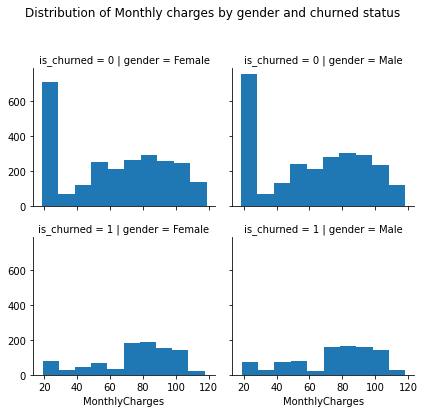

In [53]:
plot_hist(all_df, var, bins=30, 
                              title='Distribution of Monthly charges by gender and churned status', xlabel=None, 
                              r=1, c=1,
                              is_facet=True,
                              col='gender',
                              row='is_churned',
                              figsize=(11, 7))

In [54]:
# proportion of high spending churned customers

all_df[(all_df['is_churned'] == 1) &
      (all_df['MonthlyCharges'] >= 70) &
      (all_df['gender'] == 'Female')].shape[0] /all_df[(all_df['is_churned'] == 1) &
                                                      (all_df['gender'] == 'Female')].shape[0] 

0.6964856230031949

In [55]:
# proportion of senior citizen

all_df['SeniorCitizen'].value_counts(normalize=True)

0    0.837853
1    0.162147
Name: SeniorCitizen, dtype: float64

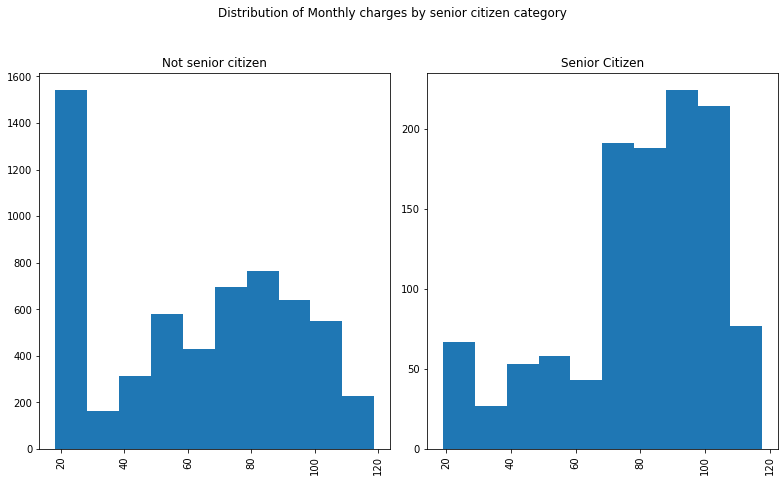

In [56]:
plot_hist(all_df, var, bins=30, 
                              title='Distribution of Monthly charges by senior citizen category', xlabel=None, 
                              legends={0: 'Not senior citizen', 1: 'Senior Citizen'},
                              r=1, c=1,
                              by='SeniorCitizen',
                              figsize=(11, 7))

In [57]:
# number of senior citizens

all_df[(all_df['SeniorCitizen'] == 1)].shape[0] 

1142

In [58]:
# proportion of senior citizens who spend $70 or more

all_df[(all_df['SeniorCitizen'] == 1) &
(all_df['MonthlyCharges'] >= 70)].shape[0] / all_df[(all_df['SeniorCitizen'] == 1)].shape[0] 

0.7556917688266199

 - While the number of senior citizens are small (1,142 in all), the distribution of monthly charges by `'SeniorCitizen'` category shows that most senior citizens (75%) are higher spenders.

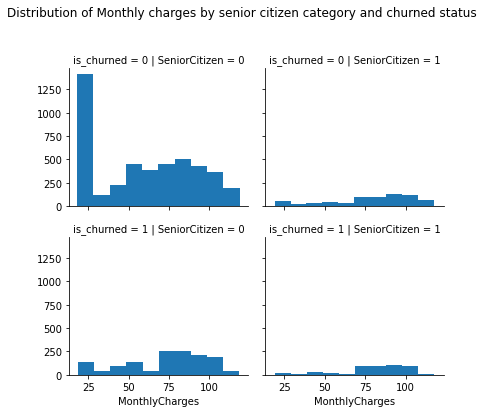

In [59]:
plot_hist(all_df, var, bins=30, 
                              title='Distribution of Monthly charges by senior citizen category and churned status', xlabel=None, 
                              legends={0: 'Not senior citizen', 1: 'Senior Citizen'},
                              r=1, c=1,
                              is_facet=True,
                              col='SeniorCitizen',
                              row='is_churned',
                              figsize=(11, 7))

This plot confirms that amoung the senior citizens who have churned, there is a higher percentage of them who are high spenders.

In [61]:
def bar_plot(df, field, stack, ax=None, aggfunc='size', title=None, axes=None):
    """
    Plot stacked bar plot showing the influence of the 
    target variable on the independent variable
    """
    df.pivot_table(index=field, columns=stack, aggfunc=aggfunc).plot(kind='bar',
                                                                    stacked=False,
                                                                    title=title, 
                                                                    ax=ax,
                                                                    figsize=(15, 15),
                                                                    )
    axes.flat[-1].set_visible(False) 
    plt.tight_layout()

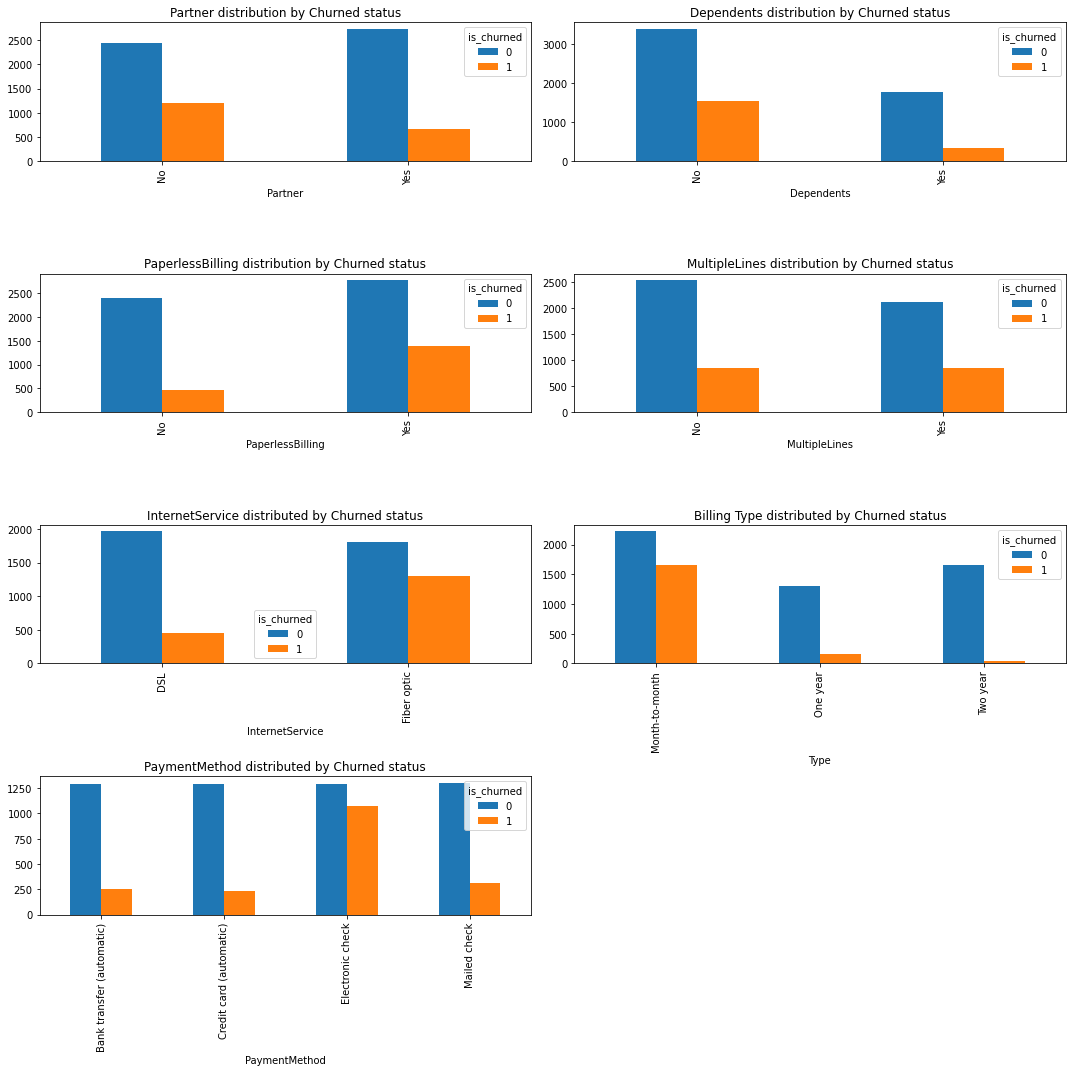

In [62]:
fig, axes = plt.subplots(4, 2, figsize=(15, 7))
cols = {
        'Partner': 'Partner distribution by Churned status',
        'Dependents': 'Dependents distribution by Churned status',
        'PaperlessBilling': 'PaperlessBilling distribution by Churned status',
        'MultipleLines': 'MultipleLines distribution by Churned status', 
        'InternetService': 'InternetService distributed by Churned status',
        'Type': 'Billing Type distributed by Churned status',
        'PaymentMethod': 'PaymentMethod distributed by Churned status'
}
for i, (field, title) in enumerate(cols.items()):
    bar_plot(all_df, field, 'is_churned', aggfunc='size', ax=axes.flatten()[i], title=title, axes=axes)

 - The height of the churned bar for customers without partners is relatively higher than the height of the churned bar for customers with partners. A similar pattern is noted for customers without dependents.

 - Churning is relatively higher for people who have opted for paperless billing. Customers with month-to-month billing plan have noticed a relatively higher number of churns.

 - There appears to be no difference in height of the churn bar for customers with/without multiple telephone lines.

 - Fiber optic is not popular among the churned customers.

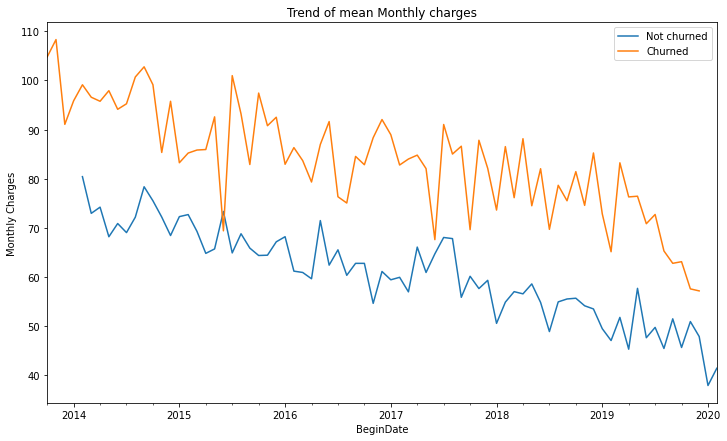

In [63]:
fig, ax = plt.subplots()
for target in [0, 1]:
    all_df[all_df['is_churned'] == target].groupby('BeginDate')['MonthlyCharges'].mean().plot(label=target, 
                                                                                             figsize=(12, 7),
                                                                                             )
plt.legend(labels=['Not churned', 'Churned'])
plt.xlabel('BeginDate')
plt.ylabel('Monthly Charges')
plt.title('Trend of mean Monthly charges')
plt.show()

The average `'MonthlyCharges'` trend shows a decline in revenue. Interestingly, the churned customers have a relatively higher mean spend compared with the non-churned customers.

In [64]:
all_df['is_churned'].value_counts()

0    5174
1    1869
Name: is_churned, dtype: int64

#### Conclusion

 - 1,869 (27%) of the customers have churned during the period from 2013-10-01 to 2020-02-01.
 - 68% of the churned customers have spent \\$70 or more per month. In contrast, 45% of the non-churned customers have spent \\$70 or more per month.
 - There is an almost equal number of male and female customers. However, female customers, on average, spend slightly more on their monthly bills than male customers do. Among the churned customers, 69% of female customers have a mean spend of \\$69 compared with \\$67 by males.
 - 1,142 (16%) of the customers are senior citizens. Of these, 76% spend \\$70 or more on their monthly bills.
 - Other behaviour noted among the churned customers are:
     - Customers with no dependents or partners tend to easily churn.
     - Monthly billing gives them an easy exit option.
     - Paperless billing and fiber optic internet plan have been a thorn in retaining such customers.
 - The `'MonthlyCharges'` trend in the last seven years has experienced a decline in revenue, with churned customers generating an average of \\$74 relative to non-churned customers who've spent an average of \\$61.

## Clarifying Questions

 - Do we have data on which cities the telco's customers are from?
 - Do we have any information on tickets? The marketing team can identify pain points not resolved by the customer support, and how long it took to resolve them.
 - Do we have the ages of the customers or age range? This information will help the marketing team bucket the groups appropriately.
 - Do we split the data into 3 parts? On which dataset are we testing the model's AUC-ROC?

## Work Plan

1. Explore the data to understand which segment of the customers have churned.
     - Exploratory analysis around gender, senior citizen and characteristics of the customers have revealed some useful insights into this question.
2. Join all the datasets using the CustomerId by making a left join with personal data. This is required for modeling.
3. There are 2 ways to fill the missing values:
     - For TotalCharges, try to infer the missing values using `'MonthlyCharges'` and `'BeginDate'`. For the phone and internet data, you could use mode to fill the missing value.
     - Build a Logistic Regression model to populate the missing values one by one to avoid any bias.
4. For feature engineering, create few features:
     - Number of days between `'EndDate'` and `'BeginDate'`. For active customers use 2020-02-01 as the end date.
     - Calculate the number of payments made using `'MonthlyCharges'` and `'TotalCharges'`.
     - Create date features from `'BeginDate'` such as `'year'`, `'month'`, `'day'` and `'dayofweek'`.
5. For modeling:
     - Convert all the boolean features using One Hot encoding. For `'Type'` and `'PaymentMethods'` use Ordinal encoding. Change the data types after conversion to reduce the data size.
     - Drop redundant features such as `'CustomerId'`, `'BeginDate'` and `'EndDate'`.
     - Stratify and split the datasets into train, valid and test. Use the test set only once with each model.
     - For the imbalance use the class_weights argument available in the respective models that will be used. Or maybe upsampling the under represented class.
     - Use 5-fold cross validation with gridsearch to find good hyperparameters.
     - Create a base model. Additionally create 3 models: LogisticRegression, RandomForestClassifier and CatBoostClassifier to pick the best performing model.